In [44]:
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
import pandas as pd
from plotly.subplots import make_subplots
import json
import re 
import yfinance as yf

In [45]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [46]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_2 = requests.get(url).text


In [47]:
gme_soup = BeautifulSoup(html_data_2,"html.parser")

In [48]:
items = []
table = gme_soup.find_all("tbody")[1]
rows = table.find_all("tr")

for row in rows:
    col = row.find_all("td")
    date = col[0].text
    rev = re.sub(r'[,\$]', '', col[1].text)  
    items.append({
        'Date': date,
        'Revenue': rev
    })


In [49]:
with open('data.json', 'w', encoding='utf-8') as json_file:
    json.dump(items, json_file, ensure_ascii=False, indent=4)

print("Data saved to data.json")

Data saved to data.json


In [50]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_2748\2068038883.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\lenovo\AppData\Local\Temp\ipykernel_2748\2068038883.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



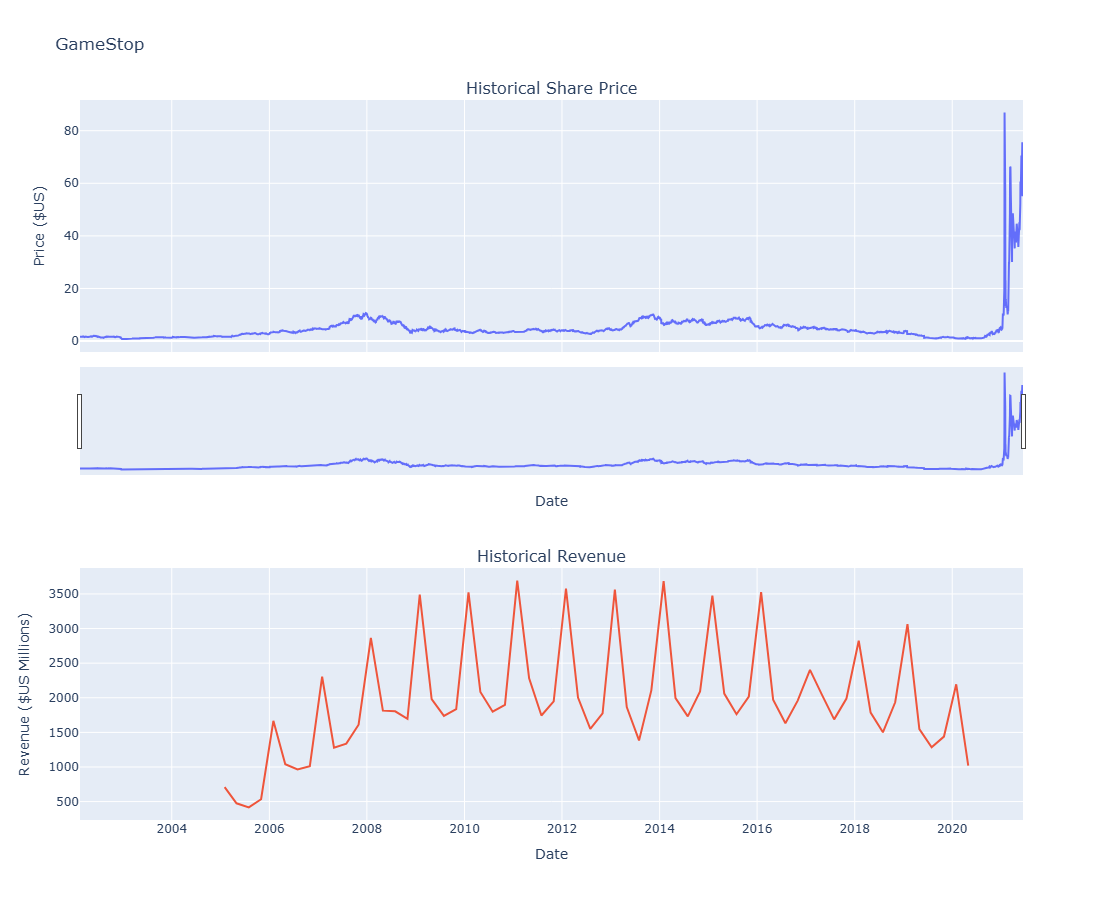

In [51]:
gme_revenue = pd.DataFrame(items)
make_graph(gme_data,gme_revenue, 'GameStop')